In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%tensorflow_version 1.x


TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf 
tf.__version__


'1.15.2'

In [ ]:
!unzip '/content/drive/MyDrive/classificationdataset.zip'

Archive:  /content/drive/MyDrive/classificationdataset.zip
   creating: classification/
   creating: classification/test/
   creating: classification/test/0 scale/
  inflating: classification/test/0 scale/cropped_leaf.117.png  
  inflating: classification/test/0 scale/cropped_leaf.119.png  
  inflating: classification/test/0 scale/cropped_leaf.12.png  
  inflating: classification/test/0 scale/cropped_leaf.120.png  
  inflating: classification/test/0 scale/cropped_leaf.123.png  
  inflating: classification/test/0 scale/cropped_leaf.126.png  
  inflating: classification/test/0 scale/cropped_leaf.13.png  
  inflating: classification/test/0 scale/cropped_leaf.15.png  
  inflating: classification/test/0 scale/cropped_leaf.151.png  
  inflating: classification/test/0 scale/cropped_leaf.152.png  
  inflating: classification/test/0 scale/cropped_leaf.16.png  
  inflating: classification/test/0 scale/cropped_leaf.17.png  
  inflating: classification/test/0 scale/cropped_leaf.172.png  
  inflati

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()


'/device:GPU:0'

In [ ]:
import os
import sys
import random
import warnings #
import numpy as np
import matplotlib.pyplot as plt
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Convolution2D, MaxPooling2D
#from keras.layers.pooling import MaxPooling2D
from keras import backend as K
from keras.utils import to_categorical
from keras.layers import Flatten, Activation, Dense
#from tensorflow.python.keras import optimizers
from keras.optimizers import SGD, Adam, Adadelta
from keras.layers.normalization import BatchNormalization
import tensorflow as tf
from keras.callbacks import  ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, CSVLogger
import cv2
import pickle
from keras import layers
from keras import Sequential

from __future__  import absolute_import
from __future__ import division
from __future__ import print_function

from datetime import datetime
from packaging import version


BATCH_SIZE = 8
IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3
dirtrain = '/content/classification/train'
dirtest = '/content/classification/test'

categories = ["0 scale", "1 scale", "2 scale", "3 scale", "4 scale"]

warnings.filterwarnings('ignore', category=UserWarning, module='skimage')
seed = 42
random.seed = seed
np.random.seed (seed)

Using TensorFlow backend.


(681, 1024, 3)


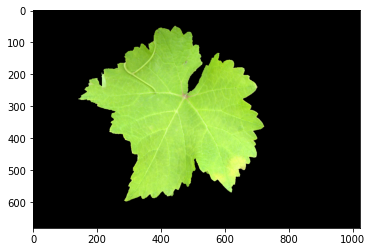

In [ ]:
for c in categories: 
  path = os.path.join(dirtrain,c)
  for i in os.listdir(path):
    img_arrray = cv2.imread(os.path.join(path,i))
    img_arrray = cv2.cvtColor(img_arrray ,cv2.COLOR_BGR2RGB)
    print(img_arrray.shape)
    plt.imshow(img_arrray)
    plt.show()
    break
  break


In [ ]:
training_data = []
def create_training_data():
    count=[]
    for c in categories:
        path=os.path.join(dirtrain,c)
        class_num=categories.index(c)
        c=0
        for i in os.listdir(path):
            c=c+1
            try:
                img_array=cv2.imread(os.path.join(path,i))
                img_array = cv2.cvtColor( img_array, cv2.COLOR_BGR2RGB)
                img_array=cv2.resize(img_array,(256,256))
                training_data.append([img_array,class_num])
            except Exception as e:
                pass
        count.append(c)
    return count
count_train=create_training_data()

In [ ]:
testing_data = []
def create_testing_data():
    count=[]
    for c in categories:
        path=os.path.join(dirtest,c)
        class_num=categories.index(c)
        c=0
        for i in os.listdir(path):
            c=c+1
            try:
                img_array=cv2.imread(os.path.join(path,i))
                img_array = cv2.cvtColor( img_array, cv2.COLOR_BGR2RGB)
                img_array=cv2.resize(img_array,(256,256))
                testing_data.append([img_array,class_num])
            except Exception as e:
                pass
        count.append(c)
    return count
count_test=create_testing_data()

In [ ]:
print(len(training_data))
print(count_train)
print(len(testing_data))
print(count_test)

407
[48, 104, 122, 90, 43]
232
[27, 54, 63, 55, 33]


In [ ]:
random.shuffle(training_data)
random.shuffle(testing_data)

In [ ]:
x_train = []
y_train = []
x_test = []
y_test = []

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               shear_range=0.1, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

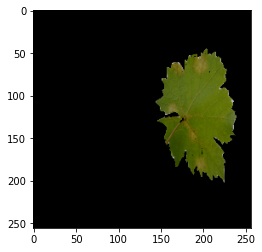

In [ ]:
x=cv2.resize(training_data[0][0],(256,256))
plt.imshow(x,cmap='gray')

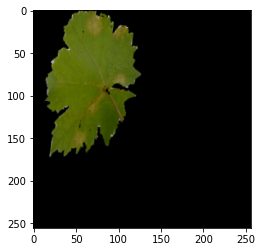

In [ ]:
plt.imshow(image_gen.random_transform(x))

In [ ]:
for features, label in training_data:
    x_train.append(features)
    y_train.append(label)

x_train= np.array(x_train).reshape(-1,256,256,3)

In [ ]:
for features, label in testing_data:
    x_test.append(features)
    y_test.append(label)
x_test= np.array(x_test).reshape(-1,256,256,3)



In [ ]:
def save_training_data(x_train,y_train):
    pickle_out=open("x_train_coloured.pickle","wb")
    pickle.dump(x_train,pickle_out)
    pickle_out.close()

    pickle_out=open("y_train_coloured.pickle","wb")
    pickle.dump(y_train,pickle_out)
    pickle_out.close
save_training_data(x_train,y_train)

In [ ]:
def save_testing_data(x_test,y_test):
    pickle_out=open("x_test_coloured.pickle","wb")
    pickle.dump(x_test,pickle_out)
    pickle_out.close()

    pickle_out=open("y_test_coloured.pickle","wb")
    pickle.dump(y_test,pickle_out)
    pickle_out.close()
save_testing_data(x_test,y_test)


In [ ]:
def load_data():
    pickle_in=open("x_train_coloured.pickle","rb")
    x_train=pickle.load(pickle_in)
    return x_train



In [ ]:
from tensorflow import keras
K.clear_session()

#Designing the model
model = Sequential()
model.add(Conv2D(64,(3,3),padding="same",input_shape=(256,256,3)))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(256,(3,3),padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256,(3,3),padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=1))

model.add(Conv2D(128,(3,3),padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, kernel_regularizer='l2'))
model.add(Activation("relu"))
model.add(BatchNormalization())
#model.add(Dropout(0.25))
model.add(Dense(5))
model.add(Activation("softmax"))

model.summary()

optimizer =  SGD(learning_rate=0.01, momentum=0.9, nesterov= True)
model.compile(loss="categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 64)      1792      
_________________________________________________________________
activation_1 (Activation)    (None, 256, 256, 64)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 85, 85, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 85, 85, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 85, 85, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 85, 85, 64)       

In [ ]:
y_train_cat= to_categorical(y_train,5)


In [ ]:
y_test_cat = to_categorical(y_test,5)

In [ ]:
from keras.callbacks import History 
history = History()

In [ ]:
#earlystopper = EarlyStopping(patience=20, verbose=1)
checkpointer = ModelCheckpoint('leaf_diseases_coloured.h5', verbose=1, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=1e-5)
results = model.fit(image_gen.flow(x_train,y_train_cat,batch_size = 32), validation_data=(x_test,y_test_cat), epochs=100, verbose=1, shuffle=True, callbacks = [history,checkpointer,reduce_lr])

Epoch 1/100
13/13 [==============================] - 8s 578ms/step - loss: 24.0064 - accuracy: 0.2359 - val_loss: 652.9634 - val_accuracy: 0.2112

Epoch 00001: val_loss improved from inf to 652.96341, saving model to leaf_diseases_coloured.h5
Epoch 2/100
13/13 [==============================] - 6s 464ms/step - loss: 23.5910 - accuracy: 0.3317 - val_loss: 388.5067 - val_accuracy: 0.1379

Epoch 00002: val_loss improved from 652.96341 to 388.50665, saving model to leaf_diseases_coloured.h5
Epoch 3/100
13/13 [==============================] - 7s 501ms/step - loss: 23.4558 - accuracy: 0.3415 - val_loss: 193.4251 - val_accuracy: 0.1207

Epoch 00003: val_loss improved from 388.50665 to 193.42511, saving model to leaf_diseases_coloured.h5
Epoch 4/100
13/13 [==============================] - 6s 497ms/step - loss: 22.6528 - accuracy: 0.3710 - val_loss: 74.2309 - val_accuracy: 0.1810

Epoch 00004: val_loss improved from 193.42511 to 74.23091, saving model to leaf_diseases_coloured.h5
Epoch 5/100


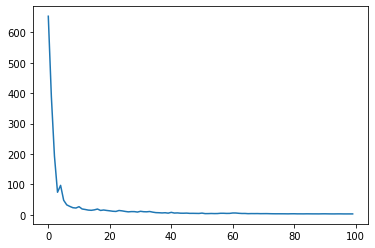

In [ ]:
#plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])




In [ ]:
model.save("leaf_diseases_coloured.h5")

In [ ]:
new_model = tf.keras.models.load_model("/content/leaf_diseases_coloured.h5")

In [ ]:
loss, acc = new_model.evaluate(x_test,y_test_cat, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

232/232 - 1s - loss: 2.9885 - acc: 0.6767
Restored model, accuracy: 67.67%


In [ ]:
from sklearn.metrics import classification_report

predictions = model.predict_classes(x_test)

In [ ]:
new_model = tf.keras.models.load_model("/content/drive/MyDrive/leaf_diseases_coloured.h5")
loss, acc = new_model.evaluate(x_test,y_test_cat, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

232/232 - 1s - loss: 3.0165 - acc: 0.6767
Restored model, accuracy: 67.67%


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.33      0.46        27
           1       0.62      0.69      0.65        54
           2       0.58      0.78      0.66        63
           3       0.62      0.62      0.62        55
           4       0.95      0.58      0.72        33

    accuracy                           0.64       232
   macro avg       0.70      0.60      0.62       232
weighted avg       0.67      0.64      0.63       232



In [ ]:
results.history['accuracy']

[0.23587224,
 0.33169532,
 0.34152335,
 0.37100738,
 0.43980345,
 0.44226044,
 0.48402947,
 0.49140048,
 0.45700246,
 0.4889435,
 0.4889435,
 0.46928746,
 0.4791155,
 0.45700246,
 0.55036855,
 0.53071254,
 0.53562653,
 0.5012285,
 0.5749386,
 0.5331695,
 0.5061425,
 0.53071254,
 0.5675676,
 0.5257985,
 0.54545456,
 0.58476657,
 0.53808355,
 0.5995086,
 0.53071254,
 0.5184275,
 0.6068796,
 0.5749386,
 0.6068796,
 0.5675676,
 0.54545456,
 0.65110564,
 0.56511056,
 0.57002455,
 0.58476657,
 0.6044226,
 0.5970516,
 0.62407863,
 0.6167076,
 0.61179364,
 0.62407863,
 0.6167076,
 0.67076164,
 0.5995086,
 0.61916465,
 0.6363636,
 0.5970516,
 0.5921376,
 0.6830467,
 0.62653565,
 0.62653565,
 0.6363636,
 0.64373463,
 0.63144964,
 0.6412777,
 0.67321867,
 0.7027027,
 0.7027027,
 0.69287467,
 0.71253073,
 0.75184274,
 0.71990174,
 0.76167077,
 0.75184274,
 0.73464376,
 0.7690418,
 0.76167077,
 0.76167077,
 0.76658475,
 0.7714988,
 0.75184274,
 0.7714988,
 0.77395576,
 0.7690418,
 0.7960688,
 0.754

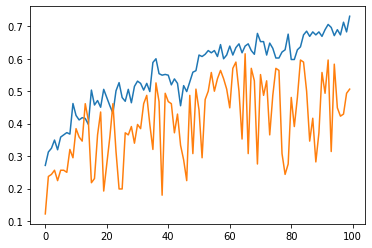

In [ ]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])

In [ ]:
d = '/content/classification/test/1 scale/cropped_leaf.942.png'
img = cv2.imread(d)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (256,256))
img = img.reshape(-1,256,256,3)



In [ ]:
predict_class = model.predict_classes(img)

In [ ]:
categories[predict_class[0]]

'1 scale'

In [ ]:
predict_class

array([1])